<a href="https://colab.research.google.com/github/EthicalFlipper/MachineLearning/blob/main/RunningTestsPart2(Test_CNN_CIFAR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the CIFAR Neural Network

Use this notebook to run tests with your new cifar data network. Remember, you can add 
```model.save('cifar_model.h5')``` 
to save and export your model. 

CIFAR10 data loaded
Predicted Label:  ship


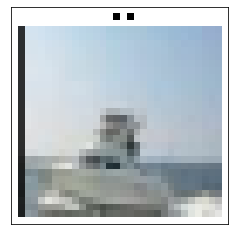

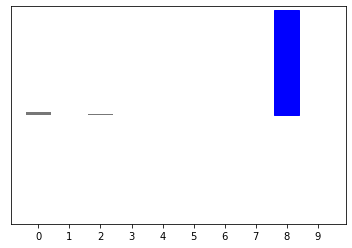

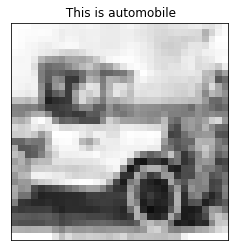

Predicted Label:  automobile


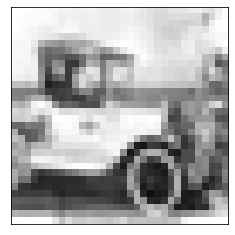

1


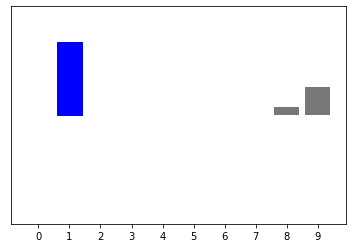

In [ ]:
from keras.preprocessing import image
from PIL import Image, ImageChops 
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load in the original data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data() 

print("CIFAR10 data loaded")

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 
train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

# This will work for the models if you download them from the links above. 
# If you want to export your own models, use the name of them here instead. 
model_1 = tf.keras.models.load_model('cifar_model.h5')
# model_2 = tf.keras.models.load_model('cnn_model.h5')

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" This is " + label_names[labels[i]])
  plt.xticks([])
  plt.yticks([])
  plt.show()

def predict_image(model, x):
  x = x.astype('float32')
  x = x / 255.0

  x = np.expand_dims(x, axis=0)

  image_predict = model.predict(x, verbose=0)
  print("Predicted Label: ", label_names[np.argmax(image_predict)])

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()
 
  # uncomment this like if you want to see the array of predictions
  # print(image_predict)
  return image_predict


def plot_value_array(predictions_array, true_label, h):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([(-1*h), h])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()


# Code to load an image called 'test3w.jpg'
# To use a different image upload it and change the name here.
path = "test_ship.png"
img = image.load_img(path, target_size=(32,32), color_mode = "rgb")
x = image.img_to_array(img)
true_label = 8

# Predicting the label using model_1.
p_arr = predict_image(model_1, x)
# This will plot the values on a graph. The last argument is the height of the y-axis.
plot_value_array(p_arr, true_label, 1)

# Displaying the 100th image from the original dataset
plot_image(test_images, 37, test_labels_backup)

# Predicting the label using model_1 on an image from test_images
img_loc = 37
img = test_images[img_loc]
x = image.img_to_array(img)
p_arr = predict_image(model_1, x)
true_label = test_labels_backup[img_loc]
print(true_label)
plot_value_array(p_arr, true_label, 1)

# Create an array of random numbers from 0 to 255 of size (32, 32, 3)
x = np.random.randint(0, 255, (32, 32, 3) )


# Test 1

Run a square image of a frog, or an airplane or any of the other classes through your network. What is the prediction?

In [ ]:
# Write code for test 1 here

# Test 2

Run a randomly generated image through the network. See if you can notice any bias with what it predicts. 

In [ ]:
# Write code for test 2 here

# Test 3

Test the network with some random images from the test_images set. See what it does with these. 

In [ ]:
# Write code for test 3 here